In [1]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade fastai fastcore timm==0.6.13 kaggle pynvml nbdev vit-pytorch nystrom-attention -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.8 MB/s eta 0:00:00


In [3]:
from pathlib import Path
import sys

if 'google.colab' in str(get_ipython()):

    base_folder = Path('/content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI')

    data_folder =  Path('/content')

else:
    # Set base folder path for storing files on local machine
    # REPLACE WITH YOUR FOLDER
    # FILL THIS ONLY IF YOU ARE RUNNING ON A LOCAL MACHINE
    print('Path is /Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data')

    base_folder = Path('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI')
    data_folder = Path('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data')


In [4]:
from pathlib import Path
import sys

# Determine the storage location based on the execution environment
# If running on Google Colab, use Google Drive as storage
if 'google.colab' in str(get_ipython()):
    custom_function_folder = Path('/content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Custom_files') # Your Google Drive

    sys.path.append(str(custom_function_folder))
    model_folder = Path('/content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data') # Google drive folder where you want to save model and logs
    model_folder.mkdir(parents=True, exist_ok=True)
    project_folder = model_folder
    kaggle_api_folder = base_folder/'Data/.kaggle'
    archive_folder = data_folder/'archive'
    archive_folder.mkdir(parents=True, exist_ok=True)

# If running locally, specify a different path
else:
    # Set base folder path for storing files on local machine
    # REPLACE WITH YOUR FOLDER
    # FILL THIS ONLY IF YOU ARE RUNNING ON A LOCAL MACHINE
    print('Path is /Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Custom_files')
    custom_function_folder = Path('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Custom_files') # Your Google Drive

    sys.path.append(str(custom_function_folder))
    model_folder = Path('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data') # Google drive folder where you want to save model and logs
    model_folder.mkdir(parents=True, exist_ok=True)
    kaggle_api_folder = base_folder/'data/.kaggle'
    archive_folder = data_folder/'archive'
    archive_folder.mkdir(parents=True, exist_ok=True)

In [5]:
! chmod 600 /content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data/.kaggle/kaggle.json
!ls -la /content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data/.kaggle

total 1
-rw------- 1 root root 70 Nov 27 02:27 kaggle.json


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data/.kaggle'

In [7]:
from fastai.vision.all import *
from kaggle import api
from fastcore.parallel import *
import timm
from zipfile import ZipFile
from vit_pytorch.efficient import ViT
from nystrom_attention import Nystromformer

In [8]:
import fastai; fastai.__version__

'2.7.13'

In [9]:
! kaggle competitions download -c inclassplantpathologysmallf23 -p {archive_folder}

 98% 543M/552M [00:05<00:00, 143MB/s]
100% 552M/552M [00:05<00:00, 99.2MB/s]


In [10]:
!ls -la /content/archive

total 565168
drwxr-xr-x 2 root root      4096 Dec  4 19:01 .
drwxr-xr-x 1 root root      4096 Dec  4 19:01 ..
-rw-r--r-- 1 root root 578718618 Nov 22 11:46 inclassplantpathologysmallf23.zip


In [11]:
file = archive_folder/'inclassplantpathologysmallf23.zip'
with ZipFile(file , 'r') as f:
    filenames = f.namelist()

In [12]:
with ZipFile(file ,'r') as f:
 f.extractall(path = data_folder)

In [13]:
train_path = data_folder/'train'
# test_path = data_folder/'test'

In [14]:
train_files = get_image_files(train_path)

(600, 400)


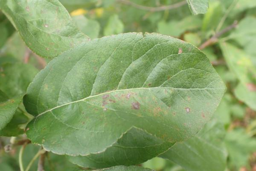

In [15]:
sample_image = PILImage.create(train_files[0])
print(sample_image.size)
sample_image.to_thumb(256)

In [16]:
from fastcore.parallel import *

In [17]:
def get_sizes(image):
    return PILImage.create(image).size

In [18]:
sizes = parallel(get_sizes, train_files, progress=True)

In [19]:
pd.Series(sizes).value_counts()

(600, 400)    12409
(600, 450)      627
(600, 600)        3
(450, 600)        2
(600, 337)        1
dtype: int64

In [20]:
df = pd.read_csv(data_folder/'train.csv')
df.head()

,image,labels
0,train_image_1.jpg,powdery_mildew
1,train_image_2.jpg,scab
2,train_image_3.jpg,scab frog_eye_leaf_spot
3,train_image_4.jpg,powdery_mildew
4,train_image_5.jpg,complex


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13042 entries, 0 to 13041
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   13042 non-null  object
 1   labels  13042 non-null  object
dtypes: object(2)
memory usage: 203.9+ KB


In [22]:
df.iloc[0:10, ]

,image,labels
0,train_image_1.jpg,powdery_mildew
1,train_image_2.jpg,scab
2,train_image_3.jpg,scab frog_eye_leaf_spot
3,train_image_4.jpg,powdery_mildew
4,train_image_5.jpg,complex
5,train_image_6.jpg,rust
6,train_image_7.jpg,scab frog_eye_leaf_spot
7,train_image_8.jpg,scab frog_eye_leaf_spot
8,train_image_9.jpg,frog_eye_leaf_spot
9,train_image_10.jpg,frog_eye_leaf_spot


In [23]:
# def get_x(df): return str(small_train_images) + '/' + (df['image'])
def get_x(df):
  return data_folder/'train/train'/df['image']
def get_y(df):
  return df['labels'].split(' ')

In [24]:
import gc
def free_memory():
    """
    Attempts to free up memory by deleting variables and running Python's garbage collector.
    """
    gc.collect()
    for device_id in range(torch.cuda.device_count()):
        torch.cuda.set_device(device_id)
        torch.cuda.empty_cache()
    gc.collect()

In [25]:
from fastai.vision.all import *
from fastai.metrics import *

batch_tfms = [*aug_transforms(size=128, min_scale=0.75, do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.1,
                      max_lighting=0.2, max_warp=0.2,
                      p_affine=0.75, p_lighting=0.75), Normalize.from_stats(*imagenet_stats)]

# Define your DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(seed=42),
    item_tfms=Resize(400, method='squish'),
    batch_tfms=batch_tfms)

# Create datasets
dsets = dblock.datasets(df)

dsets.train[3]

(PILImage mode=RGB size=600x400, TensorMultiCategory([0., 0., 0., 0., 0., 1.]))

In [26]:
import os
os.cpu_count()

8

In [42]:
dls = dblock.dataloaders(df, bs = 8)

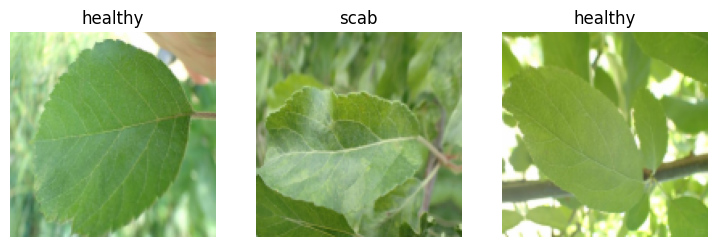

In [36]:
free_memory()
dls.train.show_batch(max_n=3)

In [37]:
dls.device

device(type='cuda', index=0)

In [38]:
model_folder

Path('/content/drive/MyDrive/Colab_Notebooks/BUAN_6382_Applied_DeepLearning/Data')

In [31]:
efficient_transformer = Nystromformer(
    # Last dimension of output tensor after linear transformation nn.Linear(..., dim).
    dim = 128,
    # Number of Transformer blocks.
    depth = 6,
    # Number of heads in Multi-head Attention layer.
    heads = 8,
    # # number of landmarks
    num_landmarks = 256
)

In [32]:
image_size = 128
patch_size = 16
n = (image_size // patch_size) ** 2
n

64

In [33]:
model = ViT(
    # Last dimension of output tensor after linear transformation nn.Linear(..., dim).
    dim = 128,
    # #If you have rectangular images, make sure your image size is the maximum of the width and height
    image_size = 128,
    # n = (image_size // patch_size) ** 2 and n must be greater than 16.
    patch_size = 16,
    # Number of classes to classify.
    num_classes = 6,
    # plugin your own sparse attention transformer (Linformer/Reformer/Nystromformer)
    transformer = efficient_transformer
)

In [43]:
learn = Learner(dls, model, metrics = [F1ScoreMulti(thresh = 0.5)],cbs = GradientAccumulation(8), path = model_folder).to_fp16()
# learn.lr_find(start_lr=1e-6, end_lr=1e-3, num_it=1000)

In [45]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,f1_score,time


KeyboardInterrupt: ignored

In [ ]:
save_pickle(model_folder/'vit_model.pkl',learn)

In [ ]:
preds, targs = learn.get_preds()

In [ ]:
xs = torch.linspace(0.05, 0.95, 45)

In [ ]:
f1score = F1ScoreMulti(thresh = None, sigmoid=False)

In [ ]:
f1scores = [f1score((preds>i) * 1, targs) for i in xs]

In [ ]:
f1scoresw = [f1score((preds>i) * 1, targs) for i in xs]

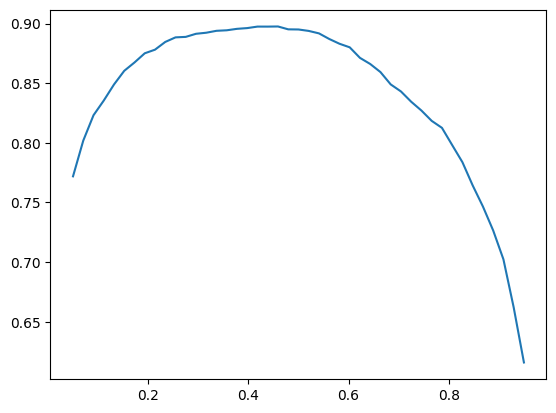

In [ ]:
plt.plot(xs, f1scores)

In [ ]:
torch.argmax(torch.tensor(f1scores))

tensor(20)

In [ ]:
xs[20]

tensor(0.4591)

In [ ]:
f1scores[20]

0.8976377253297656

In [ ]:
test_files = get_image_files(data_folder/'test/test').sorted()

In [ ]:
test_dls = model.dls.test_dl(test_files)

In [ ]:
test_dls

In [ ]:
pred_decoded = [torch.where(pred>0.34)[0] for pred in preds]
vocab = learn.dls.vocab

In [ ]:
pred_labels = [' '.join(vocab[torch.where(pred>0.34)[0]]) for pred in preds]

tensor([[3.1578e-03, 1.5837e-02, 8.0475e-01, 1.6203e-03, 9.2368e-04, 1.6699e-01],
        [6.9913e-01, 4.3639e-01, 1.6391e-03, 2.2626e-02, 8.2193e-03, 1.5493e-01],
        [1.9191e-01, 8.3398e-01, 4.8469e-03, 4.1664e-02, 3.0125e-03, 1.2781e-01],
        ...,
        [1.6525e-03, 1.7615e-03, 9.8961e-01, 1.4978e-03, 4.3746e-04, 1.4644e-03],
        [2.1153e-01, 8.8423e-01, 9.3499e-04, 2.8247e-03, 2.5352e-03, 9.8042e-02],
        [4.1037e-03, 2.7191e-03, 2.9449e-02, 9.0275e-01, 1.5418e-02, 2.6424e-02]])

In [ ]:
sample_submission= pd.read_csv(data_folder/'sample_submission.csv')

In [ ]:
sample_submission = sample_submission.sort_values(by = 'image')
sample_submission.head()

,image,labels
0,test_image_1.jpg,healthy
9,test_image_10.jpg,healthy
99,test_image_100.jpg,healthy
999,test_image_1000.jpg,healthy
1000,test_image_1001.jpg,healthy


In [ ]:
sample_submission.shape

(5590, 2)

In [ ]:
sample_submission['labels'] = pred_labels

In [ ]:
sample_submission

,image,labels
0,test_image_1.jpg,healthy
9,test_image_10.jpg,complex frog_eye_leaf_spot
99,test_image_100.jpg,frog_eye_leaf_spot
999,test_image_1000.jpg,scab
1000,test_image_1001.jpg,frog_eye_leaf_spot
...,...,...
994,test_image_995.jpg,powdery_mildew
995,test_image_996.jpg,healthy
996,test_image_997.jpg,healthy
997,test_image_998.jpg,frog_eye_leaf_spot


In [ ]:
sample_submission.to_csv(model_folder/'vit_full_sub.csv', index = False)

In [ ]:
comp = 'inclassplantpathologysmallf23'
api.competition_submit(model_folder/'vit_full_sub.csv', 'vit_full_sub dec02', comp)

100%|██████████| 166k/166k [00:00<00:00, 185kB/s]


Successfully submitted to Inclass_Plant_Pathology_Small_F23